# Install and import requirements

In [ ]:
%cd /content/drive/MyDrive/Github/Idoven
!pip install -qq -U -r requirements.txt
import numpy
import pandas
import matplotlib.pyplot
import wfdb
import scipy.signal
import utils

/content/drive/MyDrive/Github/Idoven
     |████████████████████████████████| 13.1 MB 5.2 MB/s 
     |████████████████████████████████| 288 kB 43.9 MB/s 
     |████████████████████████████████| 161 kB 77.4 MB/s 
     |████████████████████████████████| 137 kB 57.5 MB/s 
     |████████████████████████████████| 137 kB 67.1 MB/s 


# Configure some parameters

In [ ]:
leads = ['I', 'II', 'III', 'aVL', 'aVR', 'aVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6']
path = 'physionet.org/files/ptb-xl/1.0.2/'
%matplotlib inline
matplotlib.pyplot.rcParams['figure.figsize'] = (10, 5)
matplotlib.pyplot.rcParams['figure.dpi'] = 100

# Print heart rate and RR-interval variability from a 12-lead ECG-waveform

The heart rate is the number of times your heart beats per minute (bpm). For adults, the expected resting heart rate range is 60 - 100 bpm. The heart rate is an important indicator of the overall health. It can be a sign of heart or other health problems when the heart rate is too fast or too slow. The heart rate varies constantly. During exercise or stress, the heart rate automatically increases. The heart has to pump extra oxygen and nutrients through the body. But your heart rhythm should remain regular throughout the day. 

Heart rate variability is a physiological phenomena where the amount of time between the heartbeats fluctuates slightly but when it's not, it's a predictor with clinical significance of cardiovascular morbidity and mortality. It is a normal occurrence, and it isn’t an arrhythmia on its own. The normal beating of the heart is called sinus rhythm. When the heart is beating normally but the variability between heartbeats is greater than 0.12 seconds, this is called sinus arrhythmia. 

Sinus arrhythmia is usually due to breathing (this is called respiratory sinus arrhythmia), which is part of a normal reflex of your heart and circulatory system. However, when sinus arrhythmia isn’t caused by breathing, it may be a sign of another heart problem that does need assessment by a healthcare provider.

I have used the function [scipy.signal.find_peaks](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.find_peaks.html) to detect the time elapsed between two successive R-waves in any lead (where R-wave is the peak of a QRS complex of the ECG) instead of using the feature called r_peaks in ptbxl_database that only informs of this for the I lead.

In [ ]:
data_ptbxl = pandas.read_csv(path + 'ptbxl_database.csv', index_col='ecg_id')

In [ ]:
def print_heart_rate_and_RR_interval_variability(ecg_id: int, lead: int):
  
  ecg_id_filename_lr = data_ptbxl.filename_lr.iloc[ecg_id - 1]
  signal = numpy.array([wfdb.rdsamp(path + ecg_id_filename_lr)[0]])
  signal_lead = numpy.squeeze(signal[:, :, leads.index(lead)])
  matplotlib.pyplot.plot(signal_lead)
  
  if lead not in ['III', 'V1', 'V2', 'V4', 'aVL', 'aVF']:
    r_peaks = list(scipy.signal.find_peaks(signal_lead, distance=30, prominence=.75 * max(signal_lead))[0]) 
    # r_peaks = data_ptbxl.r_peaks.apply(lambda x: list(map(int, x.replace('[', '').replace(']', '').split())))
  else:
    r_peaks = list(scipy.signal.find_peaks(-signal_lead, distance=30, prominence=.75 * max(-signal_lead))[0]) 

  matplotlib.pyplot.plot(r_peaks, signal_lead[r_peaks], color="k", marker="v", linestyle="None")
  matplotlib.pyplot.xlabel("Time [10 seconds, 100 Hz]")
  matplotlib.pyplot.ylabel("Voltage [mV]")
  rate = utils.aggregate_heart_rate(r_peaks)
  variability = utils.aggregate_RR_interval_variability(r_peaks)
  matplotlib.pyplot.title(f'Lead = {lead}, BPM = {rate}, RR-interval variability = {round(variability, 1)}')

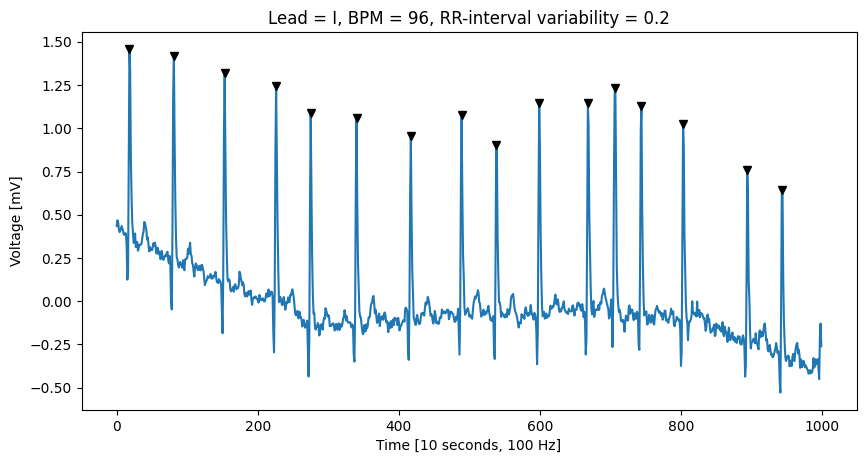

In [ ]:
print_heart_rate_and_RR_interval_variability(ecg_id=1000, lead='I');